In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap

In [ ]:

data = pd.DataFrame(np.genfromtxt('AppML_InitialProject_train.csv', names=True, delimiter=','))

variables = data.columns

electron_classification = data["p_Truth_isElectron"]
electron_data = data[electron_classification == 1]

input_variables = variables[(variables != "p_Truth_isElectron") & (variables != "p_Truth_Energy")]
input_data = data[input_variables]

scaler = MinMaxScaler()
input_data_scaled = scaler.fit_transform(input_data)


In [25]:
variances = input_data_scaled.var(axis=0)
v_in_order = np.argsort(-variances)
variables_sorted_by_variace = input_data.columns[v_in_order]
selected_variables = variables_sorted_by_variace[:10]
print("Selected variables: ", selected_variables)

selected_data = input_data[selected_variables]
selected_data_scaled = scaler.fit_transform(selected_data)


Selected variables:  Index(['p_charge', 'pX_deltaEta0', 'pX_deltaPhiRescaled0', 'pX_deltaPhi0',
       'pX_author', 'pX_MultiLepton', 'p_Eratio', 'p_vertex', 'pX_poscs2',
       'p_phi'],
      dtype='object')


/var/folders/4t/8wg0qh0j3qx0smwyw557fj280000gn/T/ipykernel_46565/3111696130.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['Cluster'] = clusters
/opt/anaconda3/envs/appliedmachinelearning/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


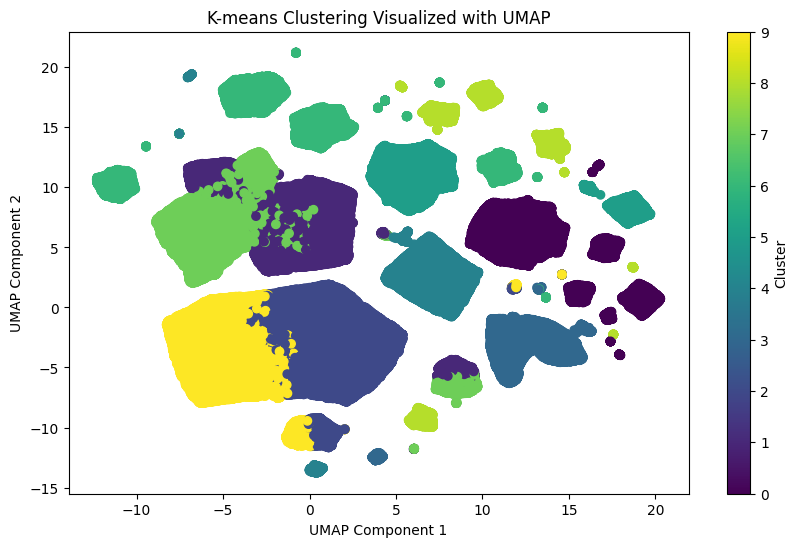

In [ ]:
#define number of clusters
k = 10

#Fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(selected_data_scaled)

input_data['Cluster'] = clusters

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_components = umap_model.fit_transform(selected_data_scaled)
input_data['UMAP1'] = umap_components[:, 0]
input_data['UMAP2'] = umap_components[:, 1]

#Plot the clusters using UMAP components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(input_data['UMAP1'], input_data['UMAP2'], c=input_data['Cluster'], cmap='viridis', marker='o')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-means Clustering Visualized with UMAP')
plt.colorbar(scatter, label='Cluster')
plt.show()

/opt/anaconda3/envs/appliedmachinelearning/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


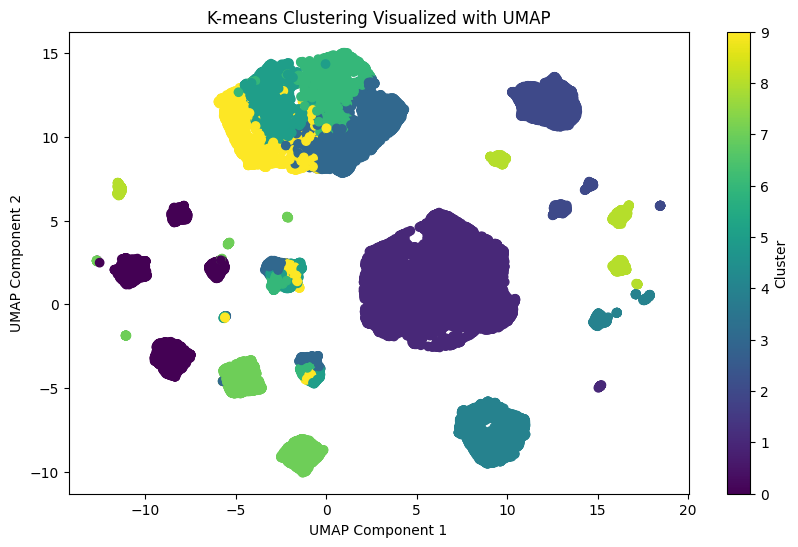

In [ ]:
test_data = pd.read_csv('AppML_InitialProject_test_clustering.csv')

input_test = test_data[selected_variables]
#normalise the features using MinMaxScaler

test_data_scaled = scaler.transform(input_test)

k = 10

# Fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(test_data_scaled)

# Add cluster labels to the data
test_data['Cluster'] = clusters

# Perform UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_components = umap_model.fit_transform(test_data_scaled)
test_data['UMAP1'] = umap_components[:, 0]
test_data['UMAP2'] = umap_components[:, 1]

# Plot the clusters using UMAP components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(test_data['UMAP1'], test_data['UMAP2'], c=test_data['Cluster'], cmap='viridis', marker='o')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-means Clustering Visualized with UMAP')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [34]:
df = pd.DataFrame(clusters, columns=['Cluster'])
df.to_csv('Clustering_TheodoreBeevers_KMeans.csv', index=True, header=False)

variables = pd.DataFrame(selected_variables, columns=['Variable'])
variables.to_csv('Clustering_TheodoreBeevers_KMeans_VariableList.csv',index=False, header=False)